### Polynomial Regression

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [132]:
np.random.seed(0)
X = np.random.rand(50,1)          # array of random numbers between 0 and 1 (0 inclusive and 1 exclusive)
y = 0.7*(X**5) - 2.1*(X**4) + 2.7*(X**3) + 3.5*(X**2) + 0.3* X + 0.4*np.random.rand(50,1)

In [133]:
X[:10]

array([[0.5488135 ],
       [0.71518937],
       [0.60276338],
       [0.54488318],
       [0.4236548 ],
       [0.64589411],
       [0.43758721],
       [0.891773  ],
       [0.96366276],
       [0.38344152]])

In [134]:
y[:10]

array([[1.73756248],
       [2.74949776],
       [2.21759508],
       [1.52872612],
       [0.98604771],
       [2.15915044],
       [1.22317572],
       [4.13374536],
       [4.91284569],
       [0.84002129]])

In [135]:
model = LinearRegression()

In [136]:
model.fit(X,y)

LinearRegression()

In [137]:
y_pred = model.predict(X)

In [138]:
y_pred[:10]

array([[2.05490162],
       [2.88164925],
       [2.32298696],
       [2.03537124],
       [1.43296849],
       [2.53731032],
       [1.50220081],
       [3.75912088],
       [4.11635232],
       [1.23314242]])

In [139]:
model.score(X,y)

0.9088277360068794

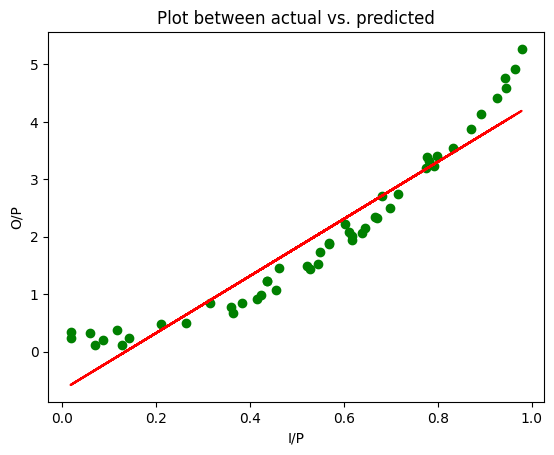

In [141]:
plt.scatter(X,y, color='green')
plt.plot(X,y_pred, color='red')
plt.xlabel("I/P")
plt.ylabel('O/P')
plt.title("Plot between actual vs. predicted")
plt.show()

#### Adding a new feature

In [142]:
X_deg2 = np.hstack([X, X**2])

In [143]:
X_deg2[:10]

array([[0.5488135 , 0.30119626],
       [0.71518937, 0.51149583],
       [0.60276338, 0.36332369],
       [0.54488318, 0.29689768],
       [0.4236548 , 0.17948339],
       [0.64589411, 0.41717921],
       [0.43758721, 0.19148257],
       [0.891773  , 0.79525908],
       [0.96366276, 0.92864592],
       [0.38344152, 0.1470274 ]])

In [144]:
model2 = LinearRegression()

In [145]:
model2.fit(X_deg2, y)

LinearRegression()

In [146]:
y_pred2 = model2.predict(X_deg2)

In [147]:
y_pred2[:10]

array([[1.66170098],
       [2.73274209],
       [1.97637256],
       [1.64000054],
       [1.05228776],
       [2.25046521],
       [1.11178982],
       [4.19529295],
       [4.88681373],
       [0.89225983]])

In [148]:
model2.score(X_deg2, y)

0.993521795497499

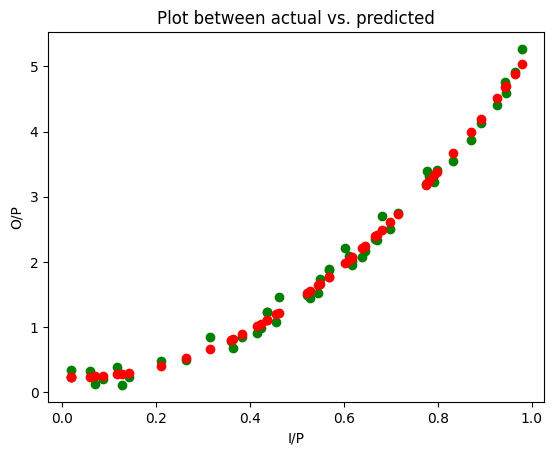

In [149]:
plt.scatter(X, y, color='green')
plt.scatter(X, y_pred2, color='red')
plt.xlabel("I/P")
plt.ylabel('O/P')
plt.title("Plot between actual vs. predicted")
plt.show()

#### Comparison between higher degrees

In [150]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [151]:
 # custom define r-squared method

def r2_score(y,y_):
    SSR = np.sum((y-y_)**2)
    SST = np.sum((y-y.mean())**2)
    score = 1 - (SSR/SST)
    return score

In [152]:
# custom define adjusted r-squared method

def adj_r2(r2, X, y):
    score = 1 - (((1-r2)*(len(y)-1))/(len(y)-X.shape[1]-1))
    return score

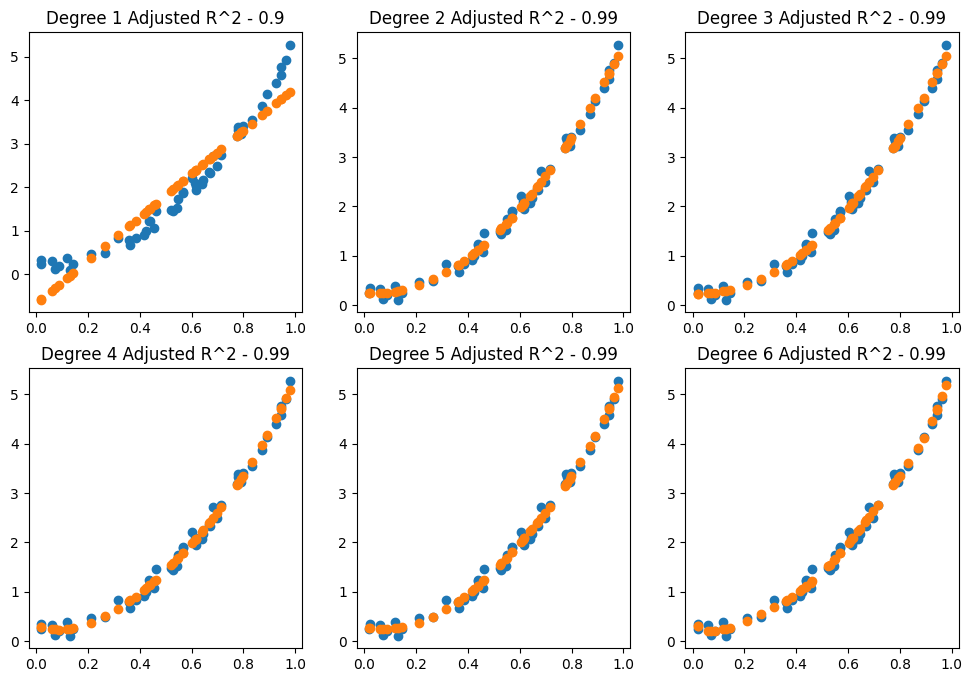

In [153]:
fig, axes = plt.subplots(2,3, figsize=(12,8))

j=0

for i in range(1,7):
    poly = PolynomialFeatures(i)
    poly_X = poly.fit_transform(X)

    scaler = StandardScaler()
    poly_X_scaled = scaler.fit_transform(poly_X)

    model = LinearRegression()
    model.fit(poly_X_scaled, y)
    
    output = model.predict(poly_X_scaled)
    
    axes[j,(i-1)%3].scatter(X, y, label="samples")
    axes[j,(i-1)%3].scatter(X, output, label="prediction")
    axes[j,(i-1)%3].set_title(f"Degree {i} Adjusted R^2 - {round(adj_r2(r2_score(y,output),poly_X_scaled,y),2)}")
    
    if i==3:
        j=1

### Underfitting and Overfitting

In [154]:
np.random.seed(1)
X = np.random.rand(100,1)
y = 0.7*(X**5) - 2.1*(X**4) + 2.7*(X**3) + 3.5*(X**2) + 0.3* X + 0.4*np.random.rand(100,1)

In [155]:
X[:10]

array([[4.17022005e-01],
       [7.20324493e-01],
       [1.14374817e-04],
       [3.02332573e-01],
       [1.46755891e-01],
       [9.23385948e-02],
       [1.86260211e-01],
       [3.45560727e-01],
       [3.96767474e-01],
       [5.38816734e-01]])

In [156]:
y[:10]

array([[1.00556963],
       [2.82246986],
       [0.3544112 ],
       [0.61236176],
       [0.49042886],
       [0.30886587],
       [0.1987081 ],
       [0.97830386],
       [1.06985878],
       [1.85385714]])

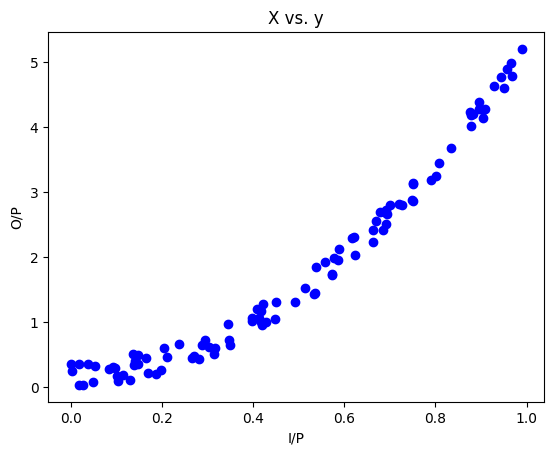

In [158]:
plt.scatter(X,y, color='blue')
plt.xlabel("I/P")
plt.ylabel('O/P')
plt.title("X vs. y")
plt.show()

In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [160]:
X_train.shape, y_train.shape

((80, 1), (80, 1))

In [161]:
X_test.shape, y_test.shape

((20, 1), (20, 1))

In [162]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

In [163]:
degrees = 100

train_scores = []
test_scores = []

train_loss = []
test_loss = []

scaler = StandardScaler()

for degree in range(1,degrees+1):
    
    poly_reg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, LinearRegression())
    poly_reg_scaled.fit(X_train, y_train)
    
    train_score = poly_reg_scaled.score(X_train, y_train)
    test_score = poly_reg_scaled.score(X_test, y_test)
    
    train_scores.append(adj_r2(train_score, X_train, y_train))
    test_scores.append(adj_r2(test_score, X_test, y_test))
    
    output1 = poly_reg_scaled.predict(X_train)
    output2 = poly_reg_scaled.predict(X_test)
    
    train_loss.append(mean_squared_error(y_train,output1))
    test_loss.append(mean_squared_error(y_test,output2))

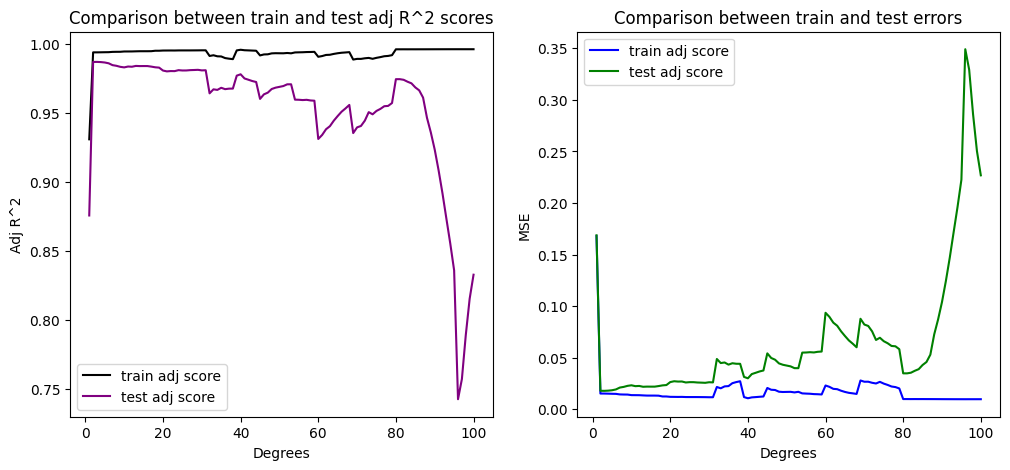

In [164]:
fig, axes = plt.subplots(1,2, figsize = (12,5))

axes[0].plot(list(range(1,101)), train_scores, color='black', label='train adj score')
axes[0].plot(list(range(1,101)), test_scores, color='purple', label='test adj score')
axes[0].set_xlabel('Degrees')
axes[0].set_ylabel('Adj R^2')
axes[0].set_title('Comparison between train and test adj R^2 scores')
axes[0].legend(loc='lower left')


axes[1].plot(list(range(1,101)), train_loss, color='blue', label='train adj score')
axes[1].plot(list(range(1,101)), test_loss, color='green', label='test adj score')
axes[1].set_xlabel('Degrees')
axes[1].set_ylabel('MSE')
axes[1].set_title('Comparison between train and test errors')
axes[1].legend(loc='upper left')

plt.show()